## Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Importing Libraries

In [1]:
#Data processing
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Seting option for full column view of Data
pd.set_option('display.max_columns', None)

#Stats & model building
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#Hide warnings
import warnings
warnings.filterwarnings("ignore")

## Downloading DATASET

In [2]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d


Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:01<00:00, 72.4MB/s] 


## Observations of the data

In [79]:

df = pd.read_csv('/content/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:

#shape of data

df.shape

(396030, 27)

In [5]:

# Statistical summary

df.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [80]:
fully_paid_percentage = (df['loan_status'].value_counts(normalize=True) * 100)['Fully Paid']
print(f"The percentage of customers who fully paid their loan amount: {fully_paid_percentage:.2f}%")


The percentage of customers who fully paid their loan amount: 80.39%


In [82]:
correlation_loan_installment = df['loan_amnt'].corr(df['installment'])
print(f"Correlation between Loan Amount and Installment: {correlation_loan_installment:.2f}")


Correlation between Loan Amount and Installment: 0.95


In [81]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

In [83]:
majority_home_ownership = df['home_ownership'].mode().values[0]
print(f"The majority of people have home ownership as: {majority_home_ownership}")


The majority of people have home ownership as: MORTGAGE


In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

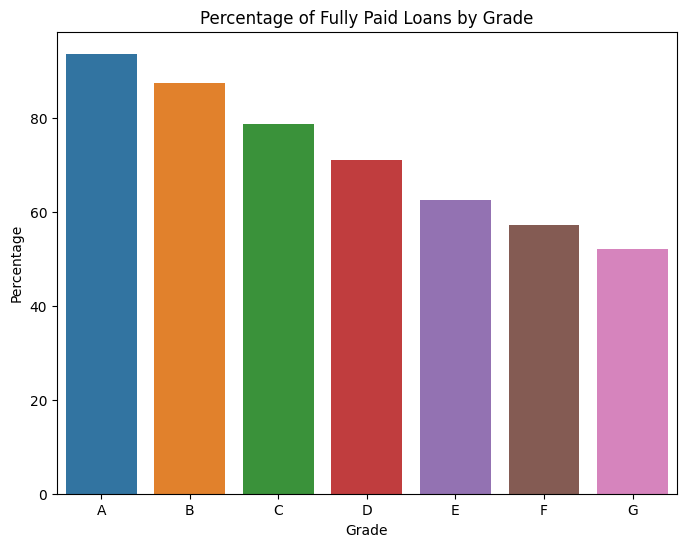

Percentage of Fully Paid Loans in each Grade:
grade
A    93.712122
B    87.426951
C    78.819100
D    71.132171
E    62.636560
F    57.212029
G    52.161100
dtype: float64


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with loan data

# Calculate the percentage of people who have paid loans in each grade
grade_paid_percentage = df[df['loan_status'] == 'Fully Paid'].groupby('grade').size() / df.groupby('grade').size() * 100

# Display the results
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_paid_percentage.index, y=grade_paid_percentage.values, order=sorted(df['grade'].unique()))
plt.title('Percentage of Fully Paid Loans by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.show()

# Print the percentage values
print("Percentage of Fully Paid Loans in each Grade:")
print(grade_paid_percentage)


In [86]:
# Assuming 'emp_title' is the column containing job titles
top_job_titles = df['emp_title'].value_counts().head(2)

# Print the top 2 job titles
print("Top 2 Afforded Job Titles:")
print(top_job_titles)


Top 2 Afforded Job Titles:
Teacher    4389
Manager    4250
Name: emp_title, dtype: int64


In [7]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display the lists of numerical and categorical columns
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

Categorical Columns:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [8]:
df[categorical_columns] = df[categorical_columns].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394275 non-nul

## Univariate Analysis

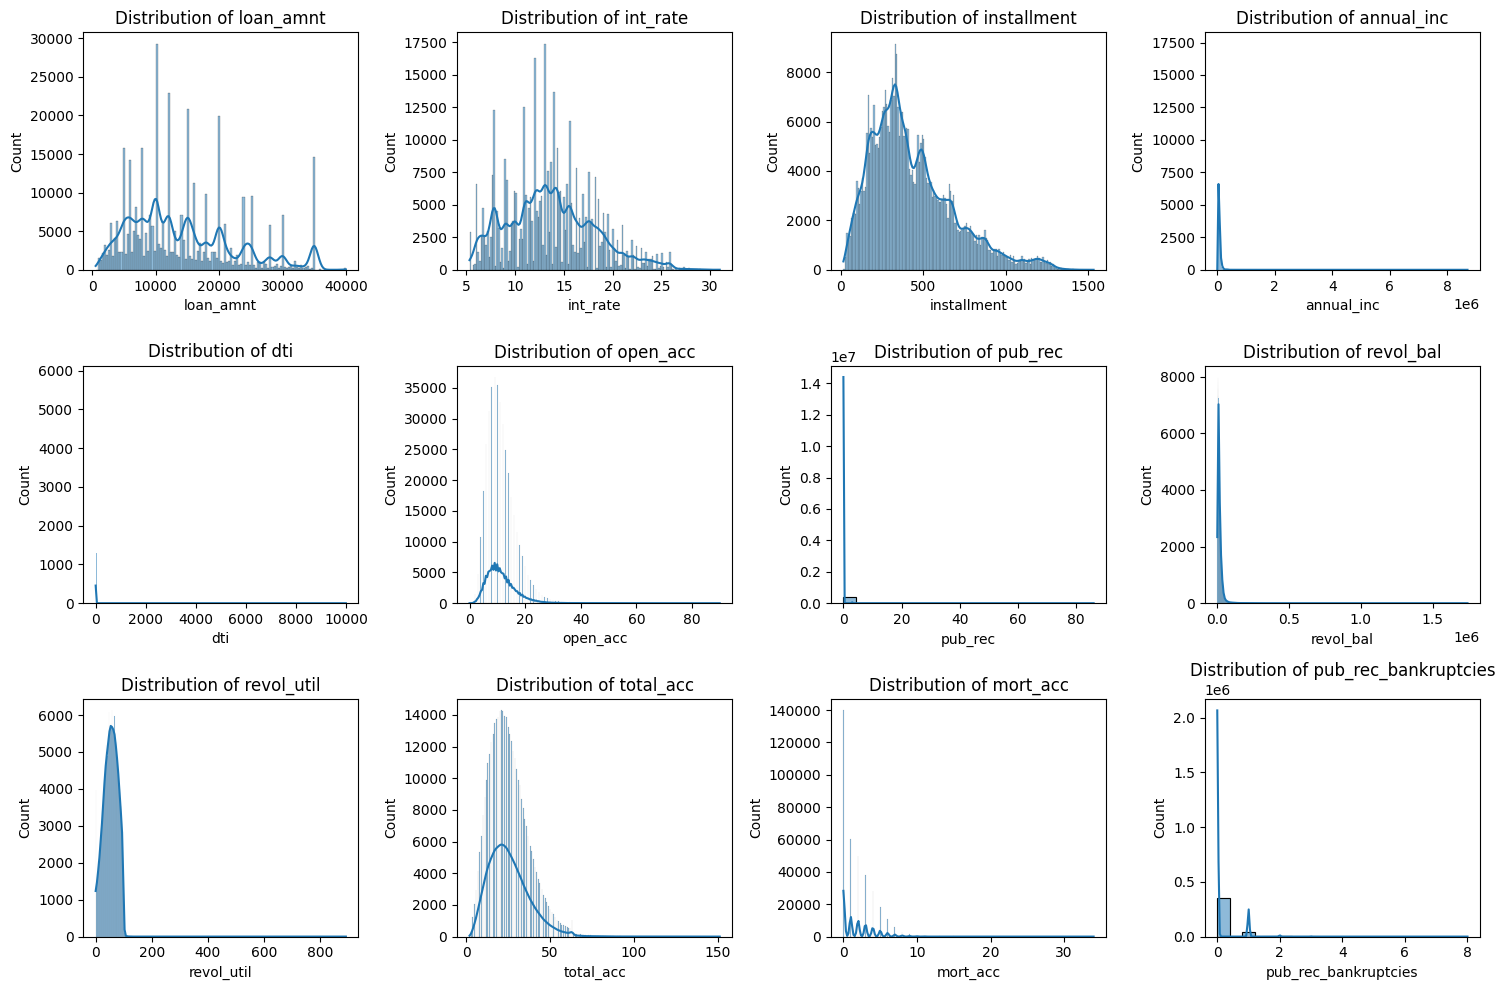

In [10]:

# Create subplots for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Distribution plots for continuous variables
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()



In [11]:
for col in categorical_columns:
 print (f"\nunique in ",col,"------",(df[col].nunique()))


unique in  term ------ 2

unique in  grade ------ 7

unique in  sub_grade ------ 35

unique in  emp_title ------ 173105

unique in  emp_length ------ 11

unique in  home_ownership ------ 6

unique in  verification_status ------ 3

unique in  issue_d ------ 115

unique in  loan_status ------ 2

unique in  purpose ------ 14

unique in  title ------ 48817

unique in  earliest_cr_line ------ 684

unique in  initial_list_status ------ 2

unique in  application_type ------ 3

unique in  address ------ 393700


In [12]:
categorical_columns = [col for col in categorical_columns if col not in ['emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address']]


In [13]:
for col in categorical_columns:
 print (f"\nunique in ",col,"------",(df[col].nunique()))


unique in  term ------ 2

unique in  grade ------ 7

unique in  sub_grade ------ 35

unique in  emp_length ------ 11

unique in  home_ownership ------ 6

unique in  verification_status ------ 3

unique in  loan_status ------ 2

unique in  purpose ------ 14

unique in  initial_list_status ------ 2

unique in  application_type ------ 3


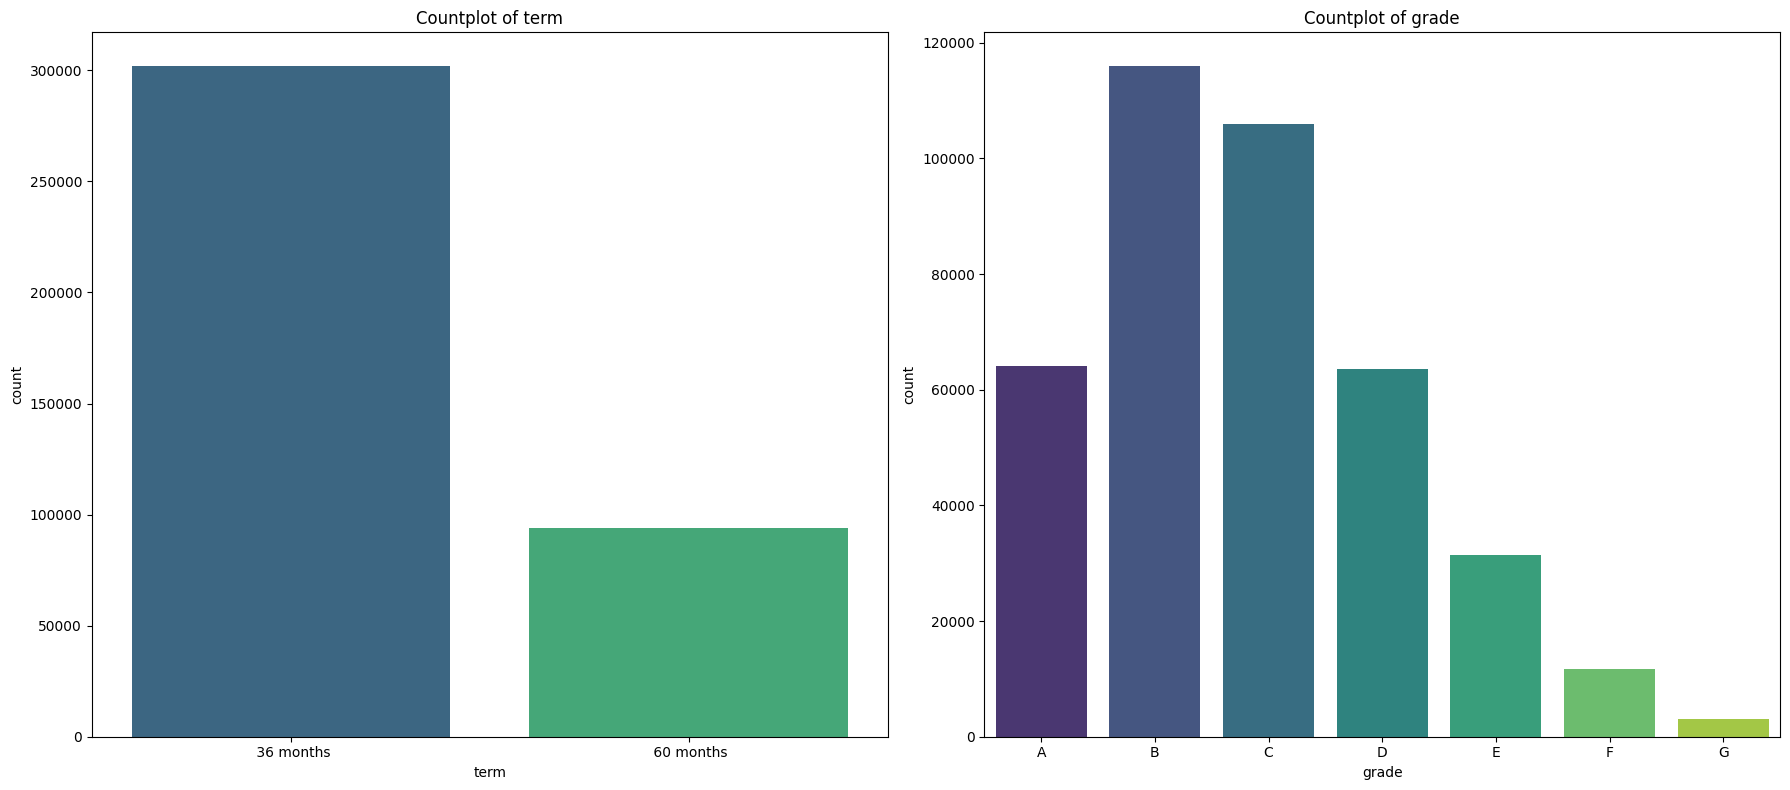

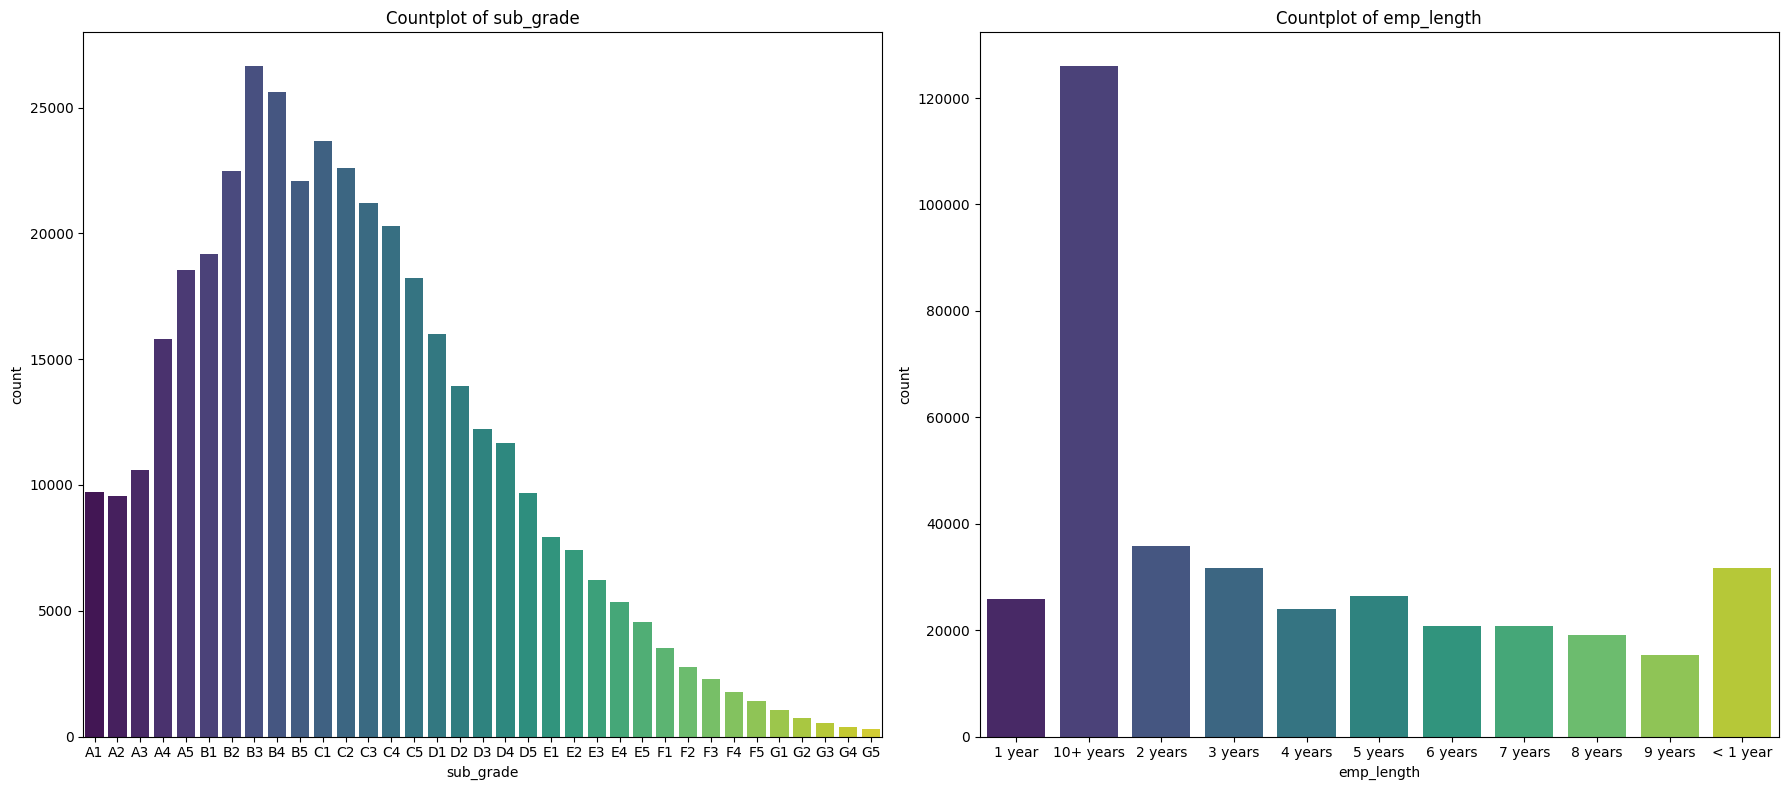

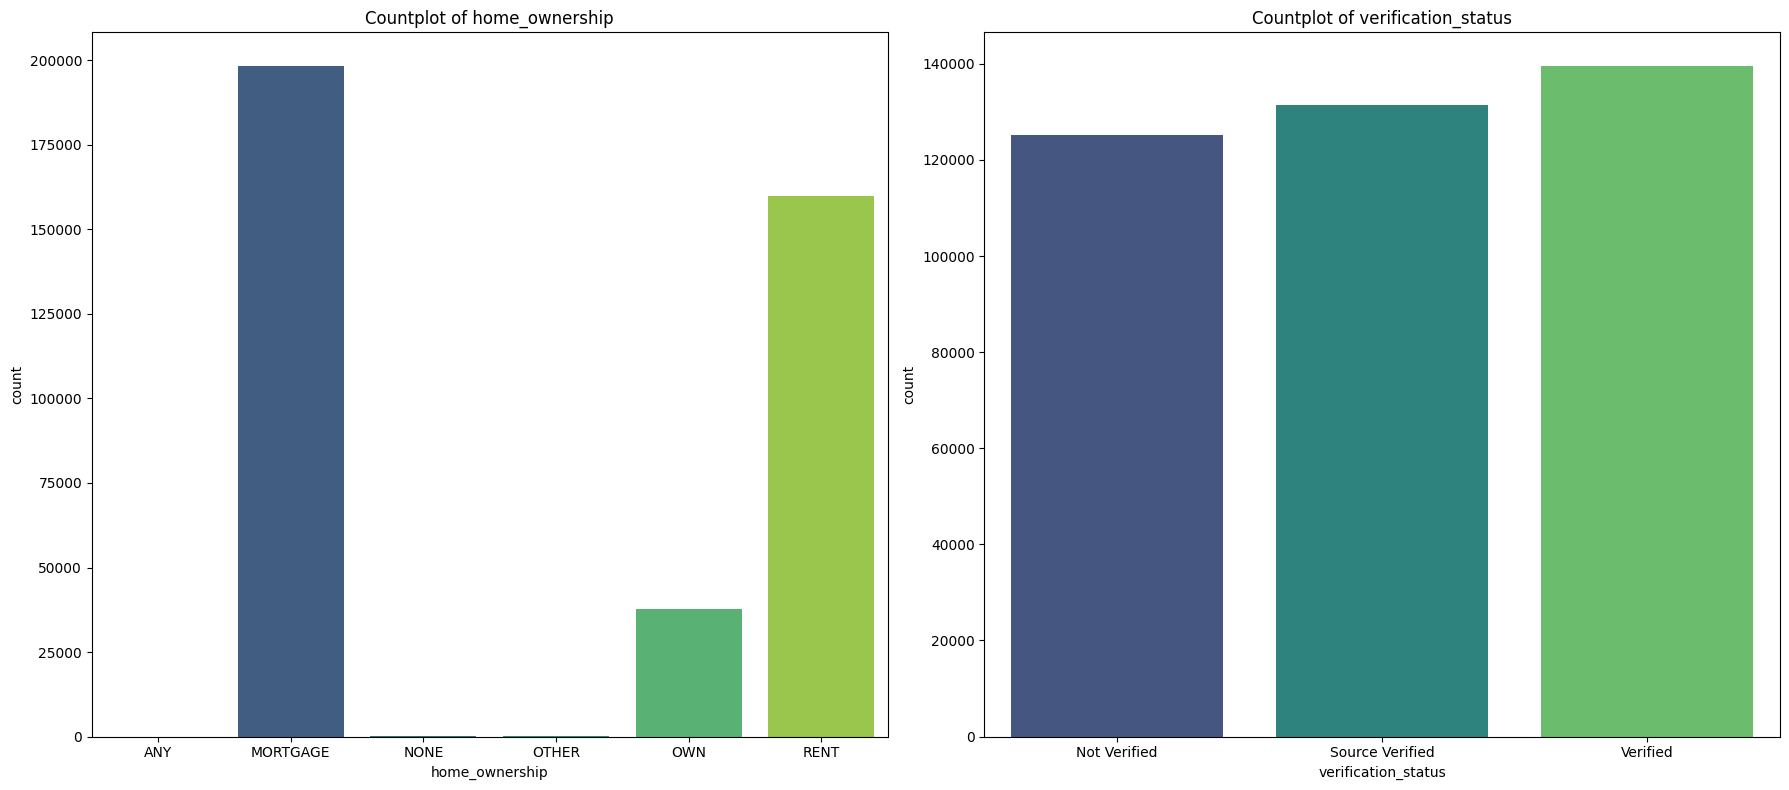

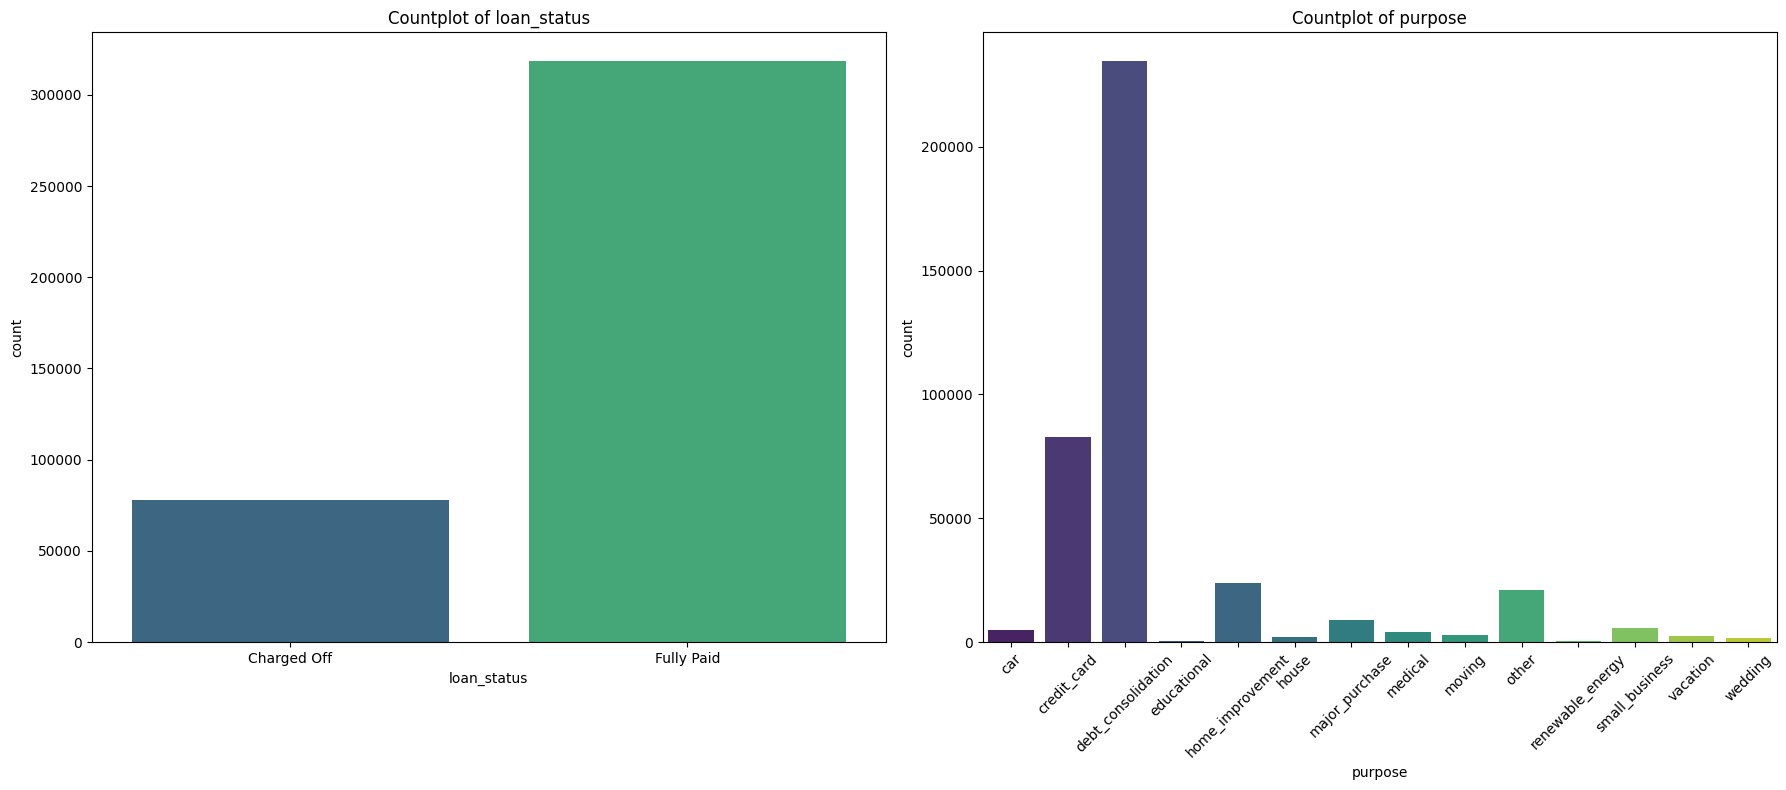

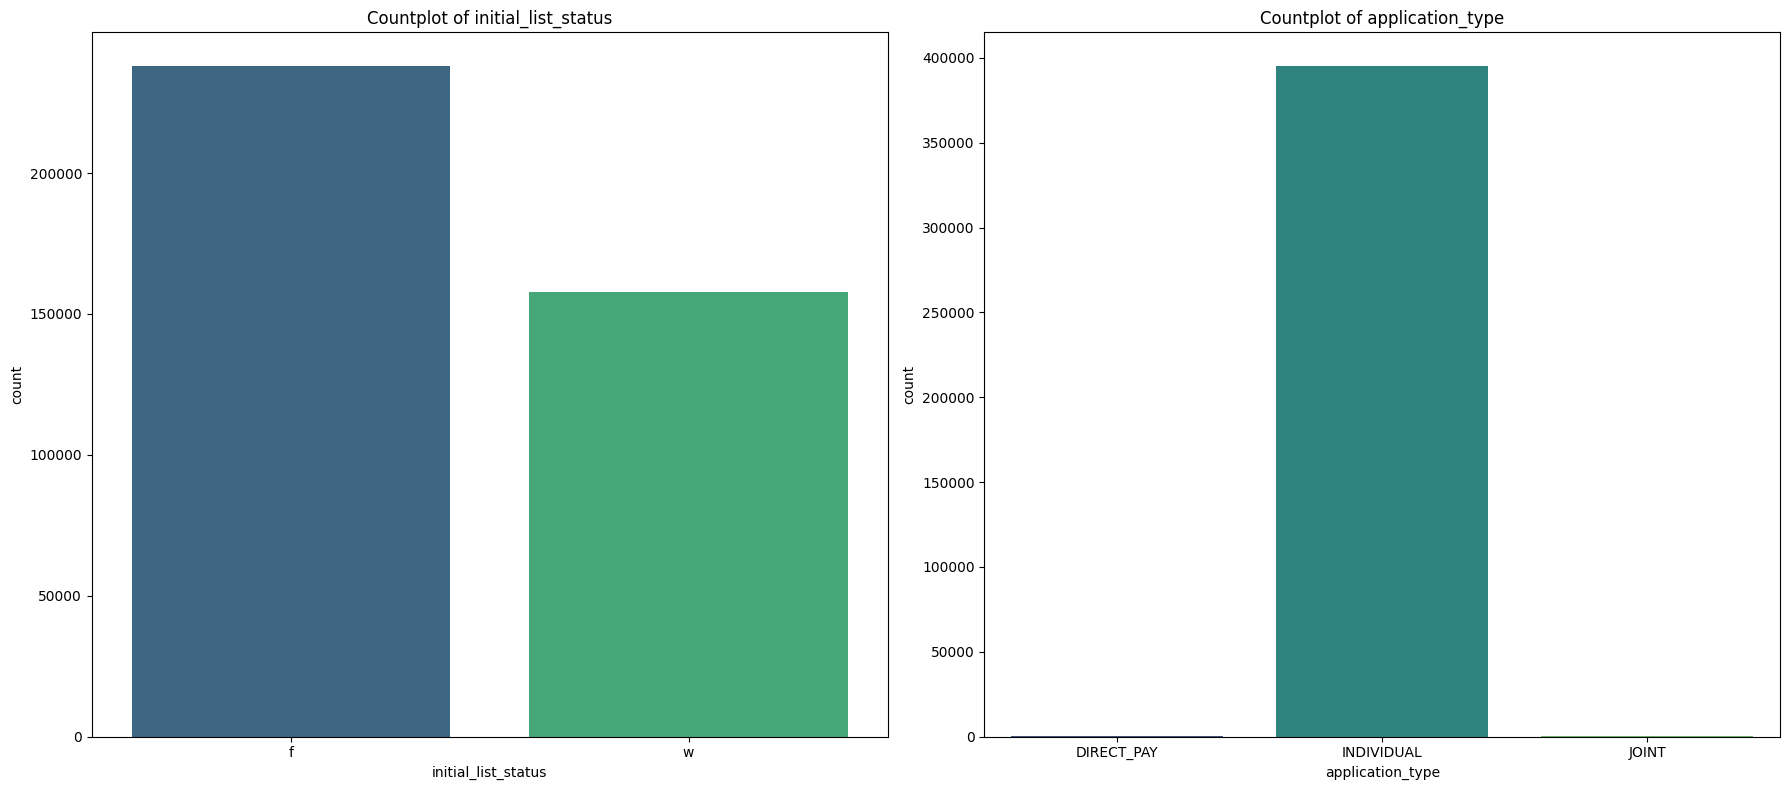

In [14]:
# Determine the number of figures
num_figures = len(categorical_columns) // 2 + len(categorical_columns) % 2

# Create subplots for categorical variables in 5 figures
for i in range(num_figures):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    # Barplots/countplots for remaining categorical variables
    for j in range(2):
        col_index = i * 2 + j
        if col_index < len(categorical_columns):
            col = categorical_columns[col_index]
            sns.countplot(x=col, data=df, palette='viridis', ax=axes[j])
            axes[j].set_title(f'Countplot of {col}')

            # Tilt x-axis labels for "purpose" column
            if col == 'purpose':
                axes[j].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

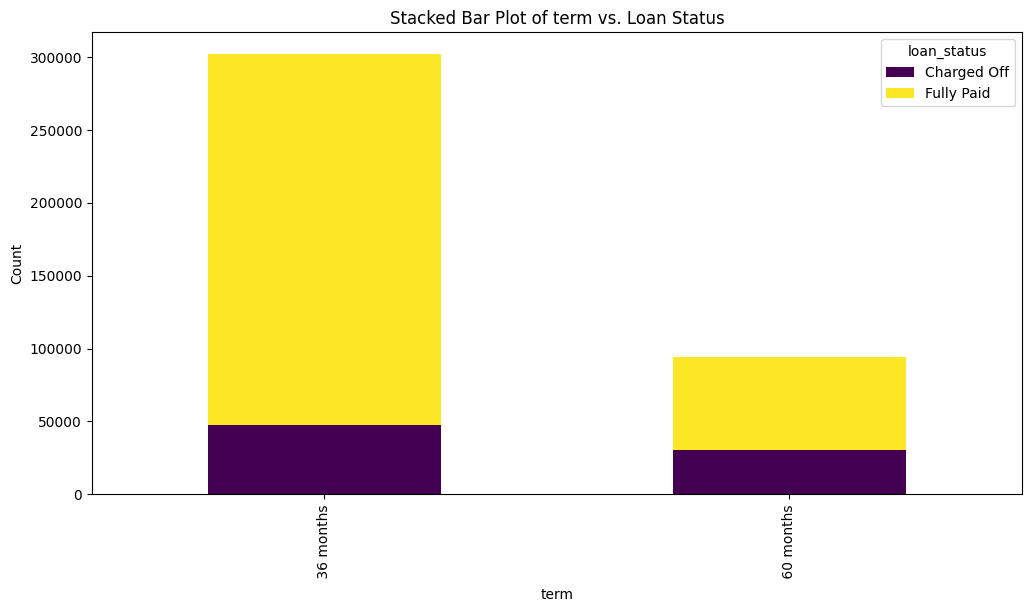

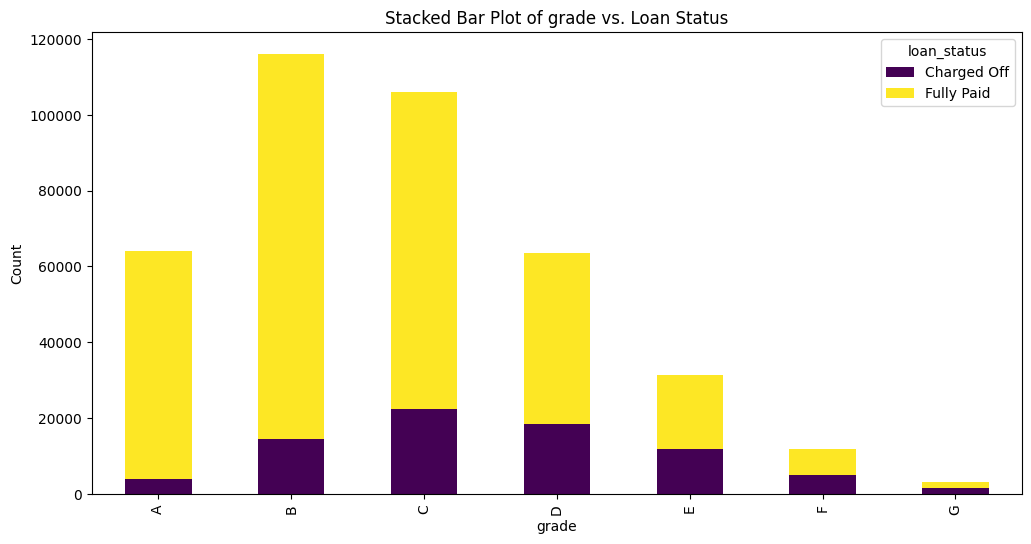

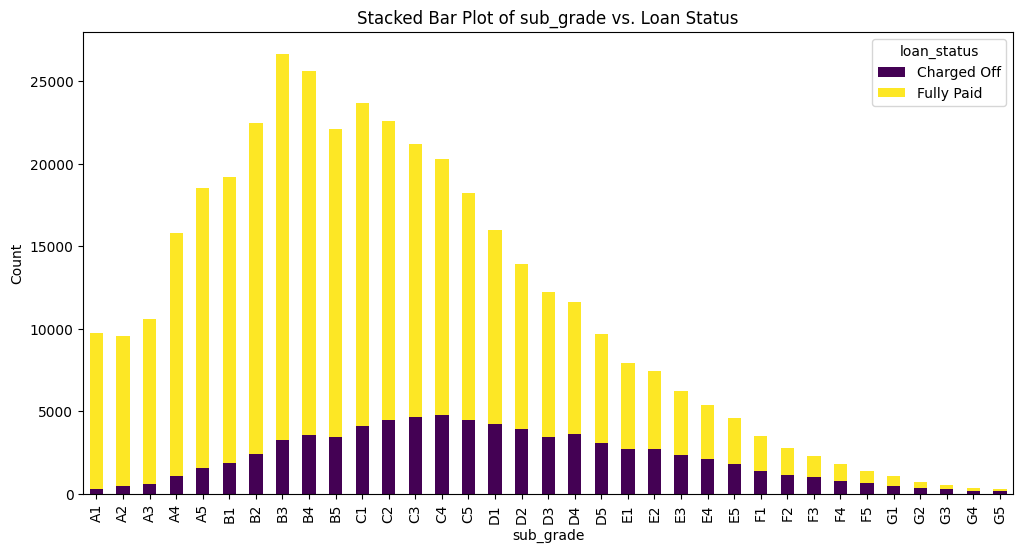

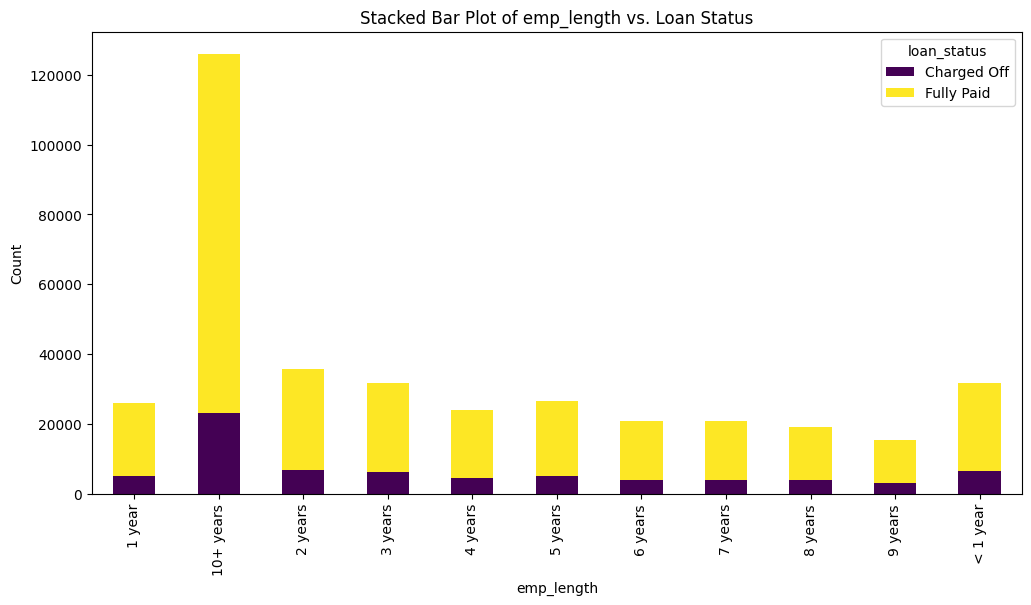

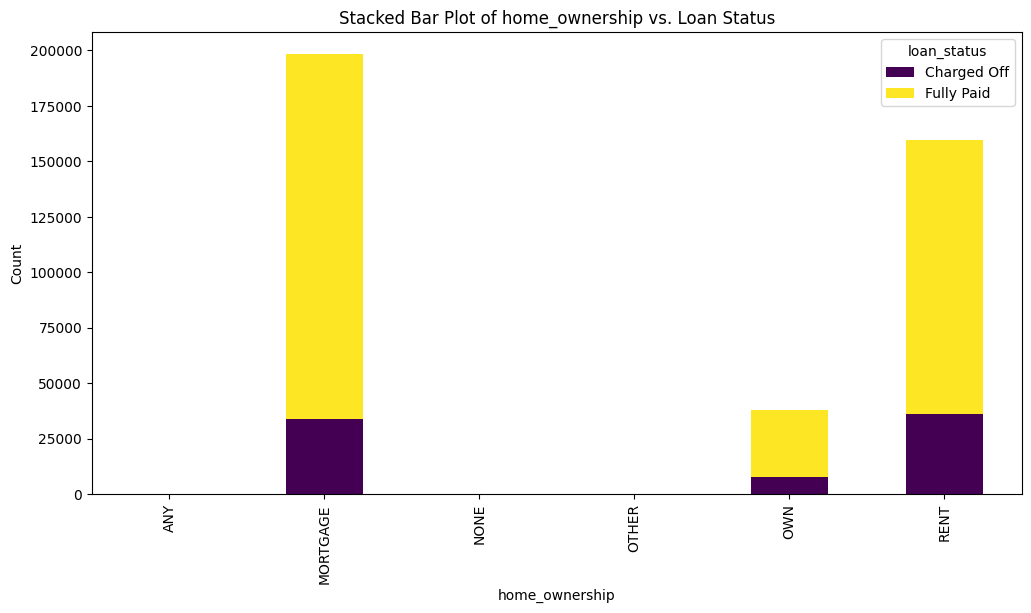

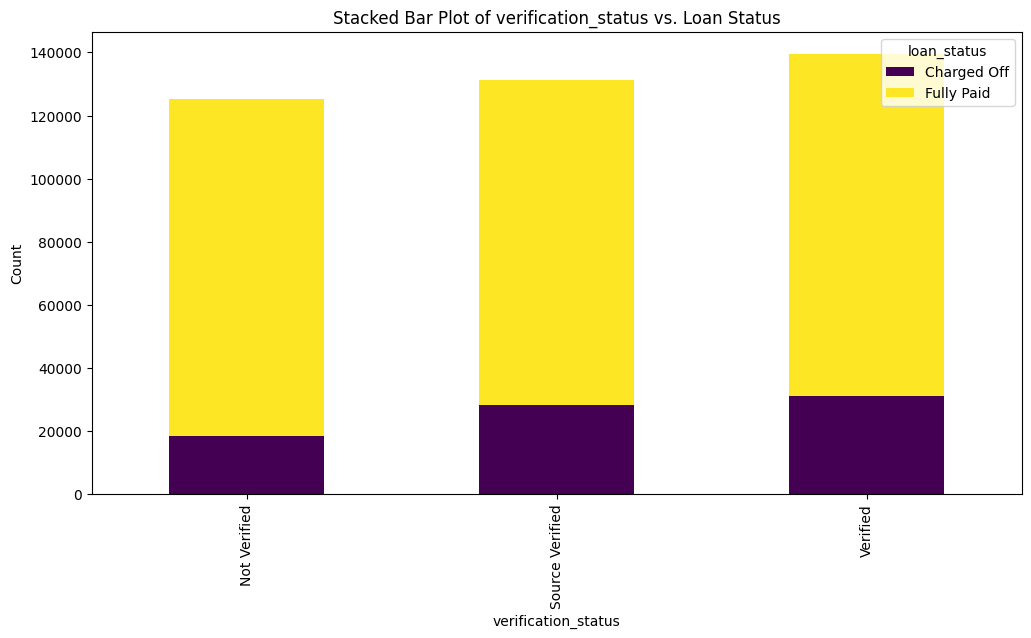

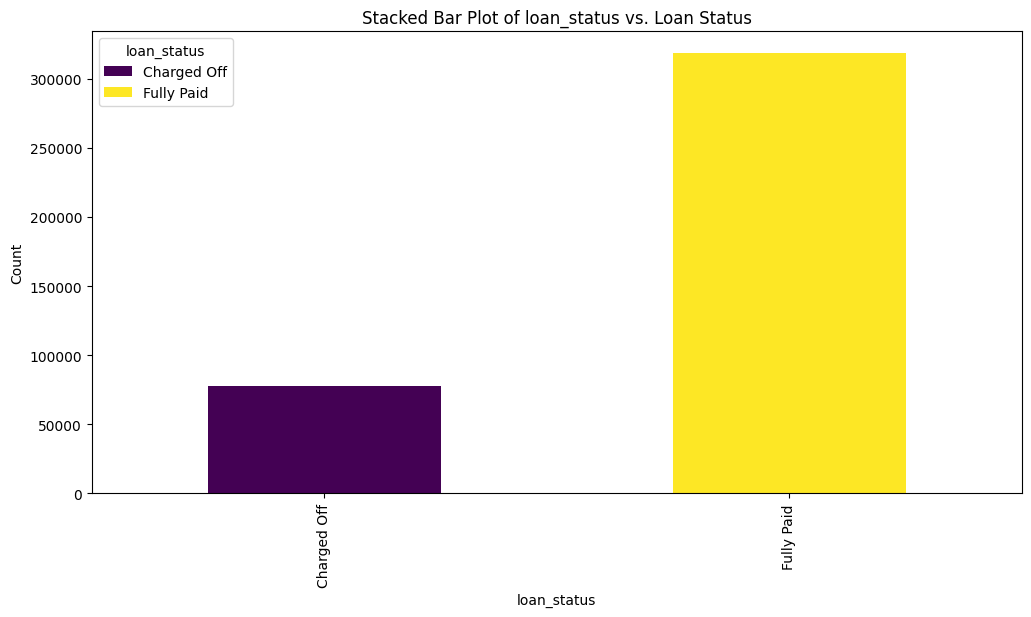

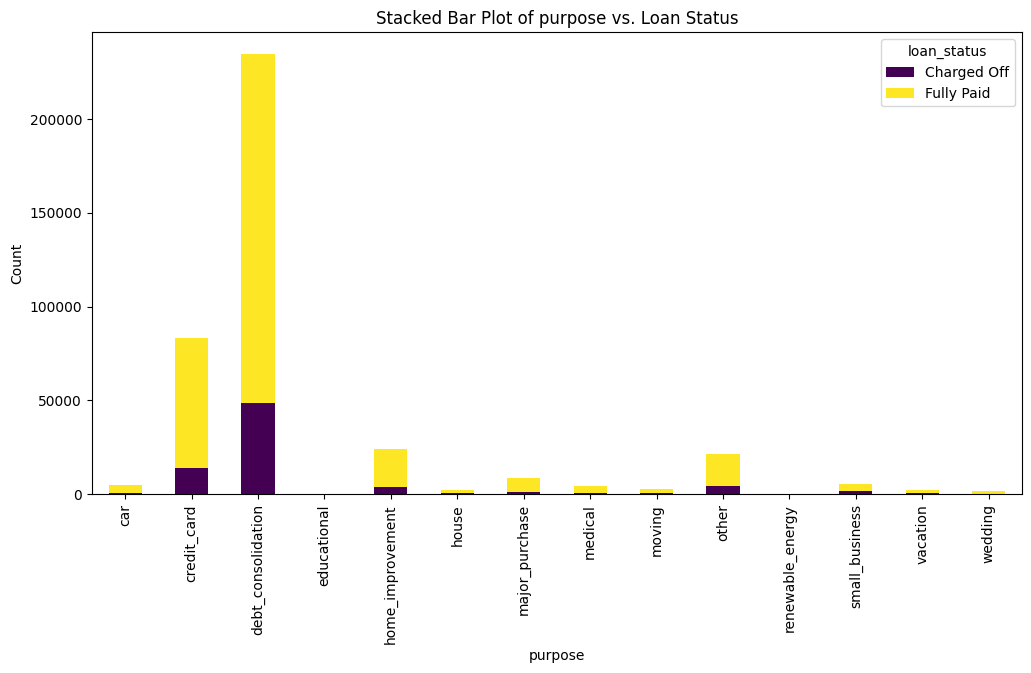

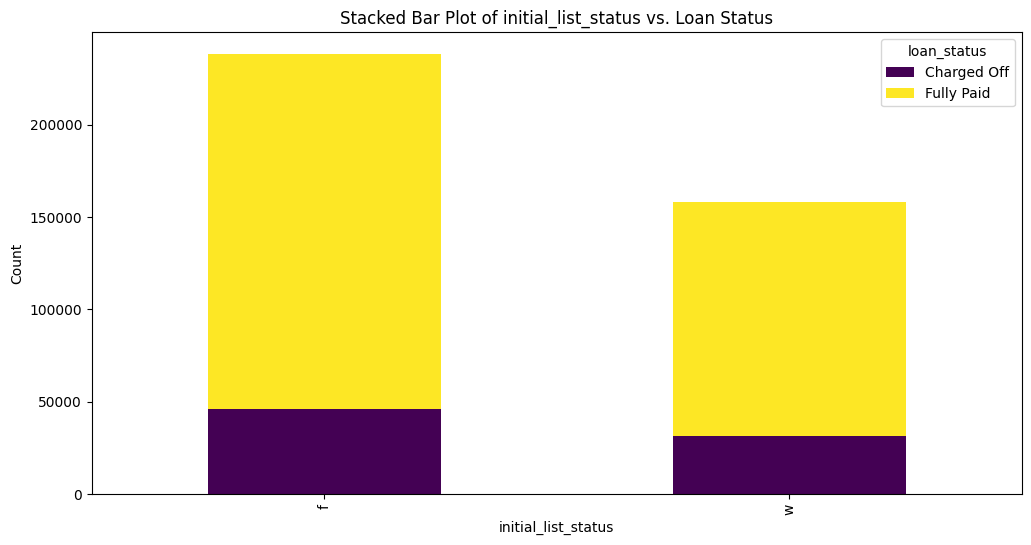

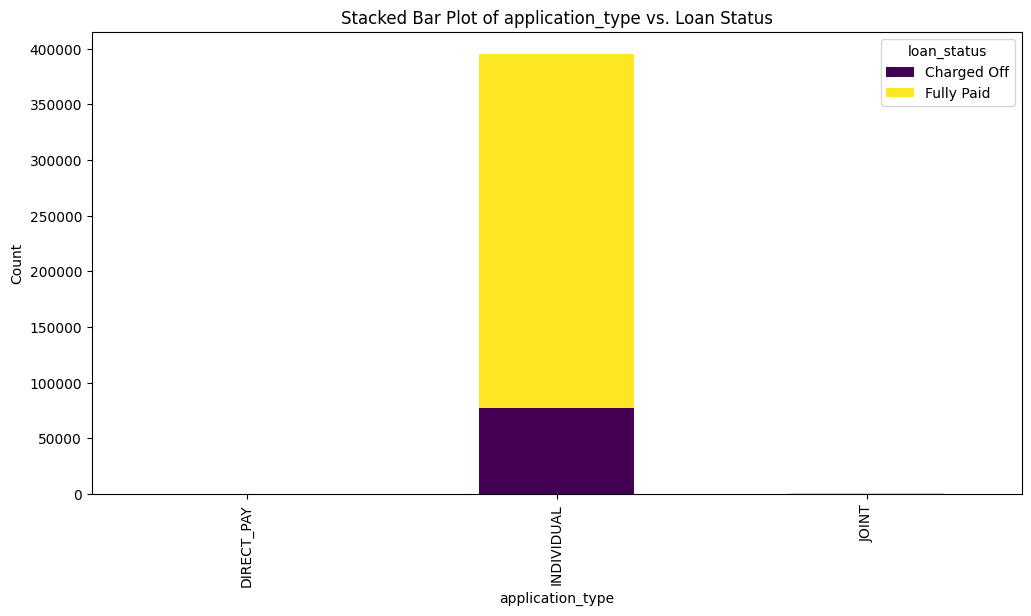

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first two categorical columns for visualization
categorical_columns_subset = categorical_columns[:]

# Stacked bar plot for categorical vs. categorical relationships
for col in categorical_columns_subset:
    ct = pd.crosstab(df[col], df['loan_status'])
    ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
    plt.title(f'Stacked Bar Plot of {col} vs. Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Observations:
* Almost 80% loans are of 36 months term
* Maximum loans (30%) fall in B grade, followed by C,A & D respectively
* The type of home ownership for 50% cases is mortgage
* The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx 25% of fully paid instances.
* 85% of applicants don't have a public record/haven't filled for bankruptcy
* 99% applicants have applied under 'individual' application type
* 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

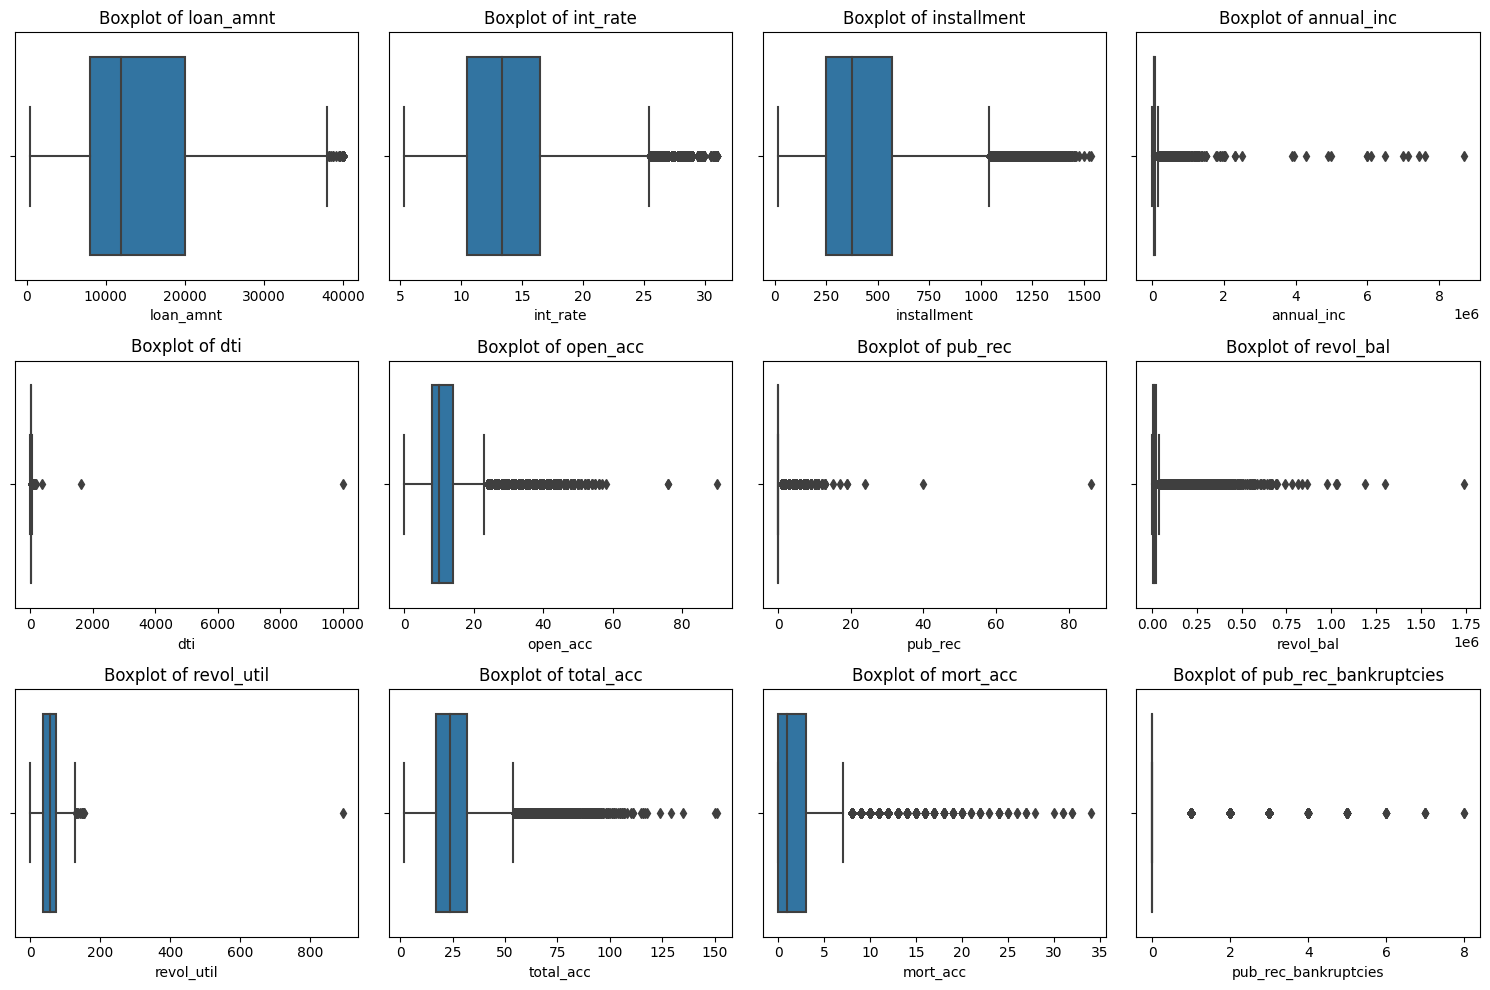

In [16]:
# Select relevant numeric columns for box plots
numeric_columns_for_boxplot = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
                                'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

# Set up subplots for box plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create box plots for each numeric column
for i, col in enumerate(numeric_columns_for_boxplot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

Too many outliers.Will Remove them later using 3 standard deviation method

## Bivariate Anlysis

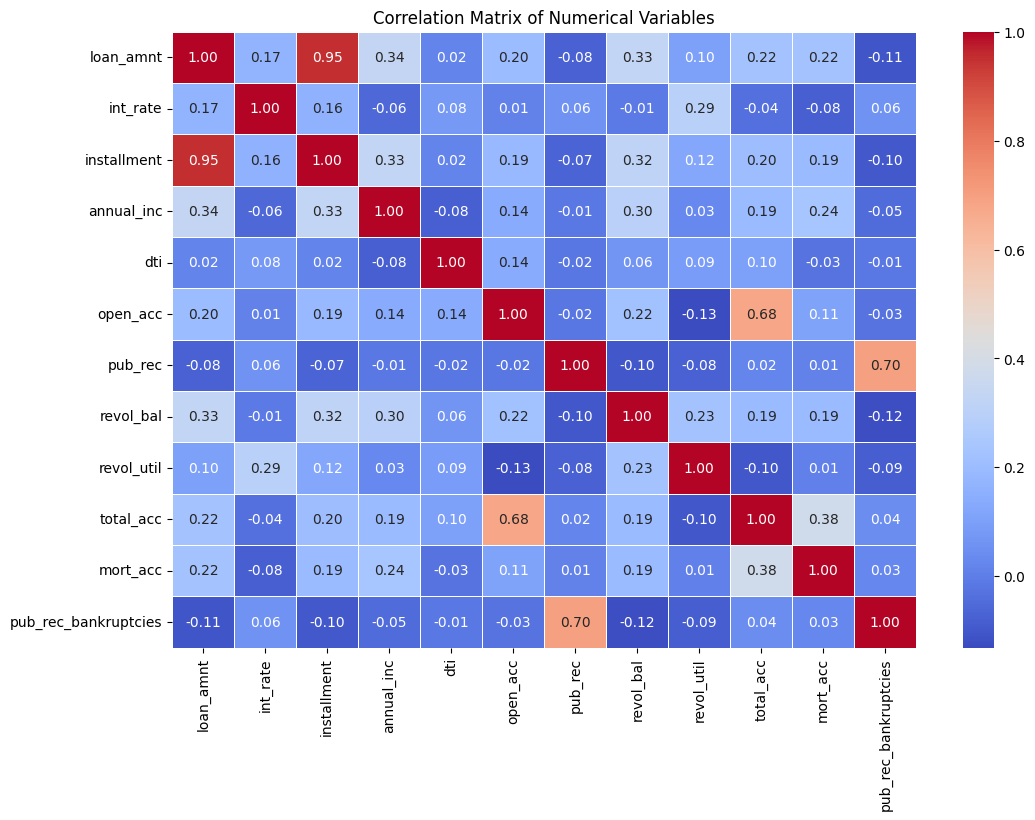

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()

# Choose a custom color palette
custom_palette = sns.color_palette("husl", as_cmap=True)

# Plotting the correlation matrix using a heatmap with a custom color palette
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Key Observations:

*Loan amount has a strong positive correlation with installment, indicating that higher loan amounts result in higher monthly installments.

*Interest rate shows a moderate positive correlation with debt-to-income ratio and a weak positive correlation with annual income.

*Open accounts and total accounts have a strong positive correlation, suggesting that individuals with more open accounts tend to have more total accounts.

*Public records and bankruptcies are moderately correlated, indicating that individuals with more public records are likely to have more bankruptcies.

In [18]:

#Drop installment
df.drop(columns=['installment'], inplace=True)

In [19]:
# Drop 'pub_rec' and 'pub_rec_bankruptcies' from numerical columns
numerical_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
numerical_columns = [col for col in numerical_columns if col not in ['pub_rec', 'pub_rec_bankruptcies']]

In [20]:
#Removing outliers using standard deviation
for col in numerical_columns:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

In [21]:
# Convert earliest credit line & issue date to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [22]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables

df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,'yes','no')
df['pub_rec'] = np.where(df['pub_rec']>0,'yes','no')
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

In [23]:
df[numerical_columns].head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc
0,10000.0,11.44,117000.0,26.24,16.0,36369.0,41.8,25.0,0.0
1,8000.0,11.99,65000.0,22.05,17.0,20131.0,53.3,27.0,3.0
2,15600.0,10.49,43057.0,12.79,13.0,11987.0,92.2,26.0,0.0
3,7200.0,6.49,54000.0,2.60,6.0,5472.0,21.5,13.0,0.0
4,24375.0,17.27,55000.0,33.95,13.0,24584.0,69.8,43.0,1.0


In [24]:
df['pub_rec_bankruptcies'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

## Duplicate Values Check

In [25]:
# Check for duplicate rows in the entire dataset
duplicates = df.duplicated(keep='first')

# Display rows with duplicate values
duplicate_rows = df[duplicates]
print("Duplicate Rows in the entire dataset:")
print(duplicate_rows)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates(keep='first')

# Optional: Print the number of removed duplicate rows
num_removed_duplicates = len(df) - len(df_no_duplicates)
print(f'Number of removed duplicate rows: {num_removed_duplicates}')


Duplicate Rows in the entire dataset:
Empty DataFrame
Columns: [loan_amnt, term, int_rate, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []
Number of removed duplicate rows: 0


In [26]:
small_col=[]
for i in (df.nunique()<100).index:
  if(df[i].nunique()<100):
    small_col.append(i)
small_col





['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'pub_rec',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies']

In [27]:
for col in small_col:
 print (f"\nunique in ",col,"------",(df[col].unique()))


unique in  term ------ [' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

unique in  grade ------ ['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

unique in  sub_grade ------ ['B4', 'B5', 'B3', 'A2', 'C5', ..., 'F3', 'G4', 'F2', 'G3', 'G5']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']

unique in  emp_length ------ ['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '7 years', '8 years', '5 years', '1 year', NaN]
Length: 12
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years',
                          '9 years', '< 1 year']

unique in  home_ownership ------ ['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

unique in  verification_status ------ ['Not Verified', 'Source Verified', 'Verified']
Categories (3, object): ['Not Verified'

In [28]:
df[categorical_columns].nunique()

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
loan_status             2
purpose                14
initial_list_status     2
application_type        3
dtype: int64

In [29]:
df["issue_d"]

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 375771, dtype: category
Categories (115, datetime64[ns]): [2008-04-01, 2009-04-01, 2010-04-01, 2011-04-01, ..., 2013-09-01,
                                   2014-09-01, 2015-09-01, 2016-09-01]

In [30]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 375771, dtype: category
Categories (48817, object): ['\tcredit_card', '\tdebt_consolidation', '\tother', '\tsmall_business',
                             ..., 'zonball Loan', 'zxcvb', '~Life Reorganization~',
                             '~Summer Fun~']

In [31]:
df["term"]

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 375771, dtype: category
Categories (2, object): [' 36 months', ' 60 months']

In [32]:
df['application_type'].value_counts()

INDIVIDUAL    375151
JOINT            385
DIRECT_PAY       235
Name: application_type, dtype: int64

## Missing Value Treatment

In [33]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               21865
emp_length              17594
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1626
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                253
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                36725
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [34]:
# Calculate the mean of 'mort_acc' for each unique value of 'total_acc'
mort_acc_mean_by_total_acc = df.groupby('total_acc')['mort_acc'].mean()

# Define a function to fill missing 'mort_acc' values based on 'total_acc'
def fill_mort_acc(row):
    if pd.isnull(row['mort_acc']):
        return mort_acc_mean_by_total_acc[row['total_acc']]
    else:
        return row['mort_acc']

# Apply the function to fill missing values in 'mort_acc'
df['mort_acc'] = df.apply(fill_mort_acc, axis=1)

In [35]:
# For 'emp_title', add 'Unknown' to the existing categories
df['emp_title'] = df['emp_title'].cat.add_categories('Unknown')
df['emp_title'].fillna('Unknown', inplace=True)

In [36]:
df['emp_length'].unique()

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '7 years', '8 years', '5 years', '1 year', NaN]
Length: 12
Categories (11, object): ['1 year', '10+ years', '2 years', '3 years', ..., '7 years', '8 years',
                          '9 years', '< 1 year']

## Feature Engineering

In [37]:

import re  # Add this line to import the 're' module

# Define a function to extract numbers from the 'emp_length' string
def extract_years(emp_length):
    if pd.notnull(emp_length):
        # Extract numbers from the string
        years = re.findall(r'\d+', emp_length)
        if years:
            return int(years[0])
    return np.nan  # Return NaN for missing or unexpected values

# Apply the function to convert 'emp_length' to numerical values
df['emp_length'] = df['emp_length'].apply(extract_years)


In [38]:
# Calculate the median of 'emp_length' excluding NaN values
emp_length_median = df['emp_length'].median()

# Fill missing values with the median
df['emp_length'].fillna(emp_length_median, inplace=True)


In [39]:
# Add 'Not Specified' to the existing categories
df['title'] = df['title'].cat.add_categories('Not Specified')

# Fill missing values with the new category
df['title'].fillna('Not Specified', inplace=True)


In [40]:
# Drop rows with any remaining missing values
df.dropna(inplace=True)


In [41]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [42]:
df['address'].sample(10)

319730    770 Audrey Throughway Suite 665\r\nTonyfort, D...
147481               454 May Forges\r\nNorth Erin, UT 22690
90112              071 Melissa Ports\r\nLouisside, MI 48052
122796    16694 Patrick Center Apt. 539\r\nWest Janet, N...
328279         6945 Nicholas Plain\r\nSouth Kevin, GA 29597
335792      973 Weaver Squares\r\nEast Tonyaburgh, IN 00813
40447     878 Eaton Curve Apt. 551\r\nNorth Larry, DE 70466
340999          417 Deborah Plains\r\nTheresastad, IA 48052
266755    136 Rachel Throughway Apt. 044\r\nPort Nicoleb...
86518     61375 Ward Square Suite 564\r\nJamesstad, WY 3...
Name: address, dtype: category
Categories (393700, object): ['000 Adam Station Apt. 329\r\nAshleyberg, AZ 2..., '000 Adrian Cliffs\r\nRandyton, LA 22690',
                              '000 Alexandria Street\r\nPort Richard, FL 22690', '000 Amber Court\r\nLake Pamelatown, IN 00813',
                              ..., 'Unit 9995 Box 8360\r\nDPO AP 00813',
                              'Unit 9996 Bo

In [43]:

# Extract state and zip code from the 'address' column
df[['state', 'zip_code']] = df['address'].str.extract(r'([A-Z]{2}) (\d{5})')


In [44]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code
0,10000.0,36 months,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",OK,22690
1,8000.0,36 months,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",SD,05113
2,15600.0,36 months,10.49,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",WV,05113
3,7200.0,36 months,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,"823 Reid Ford\r\nDelacruzside, MA 00813",MA,00813
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,"679 Luna Roads\r\nGreggshire, VA 11650",VA,11650


In [45]:
#Drop address
df.drop(["address"], axis = 1, inplace=True)

In [46]:

df.zip_code.nunique()

10

Since there are only 10 zipcodes, we can change the datatype of zipcodes to categorical

In [47]:

df['zip_code'] = df['zip_code'].astype('category')

In [48]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,zip_code
0,10000.0,36 months,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,OK,22690
1,8000.0,36 months,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,SD,05113
2,15600.0,36 months,10.49,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,WV,05113
3,7200.0,36 months,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,MA,00813
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,VA,11650


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 375518 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             375518 non-null  float64       
 1   term                  375518 non-null  category      
 2   int_rate              375518 non-null  float64       
 3   grade                 375518 non-null  category      
 4   sub_grade             375518 non-null  category      
 5   emp_title             375518 non-null  category      
 6   emp_length            375518 non-null  float64       
 7   home_ownership        375518 non-null  category      
 8   annual_inc            375518 non-null  float64       
 9   verification_status   375518 non-null  category      
 10  issue_d               375518 non-null  category      
 11  loan_status           375518 non-null  category      
 12  purpose               375518 non-null  category      
 13 

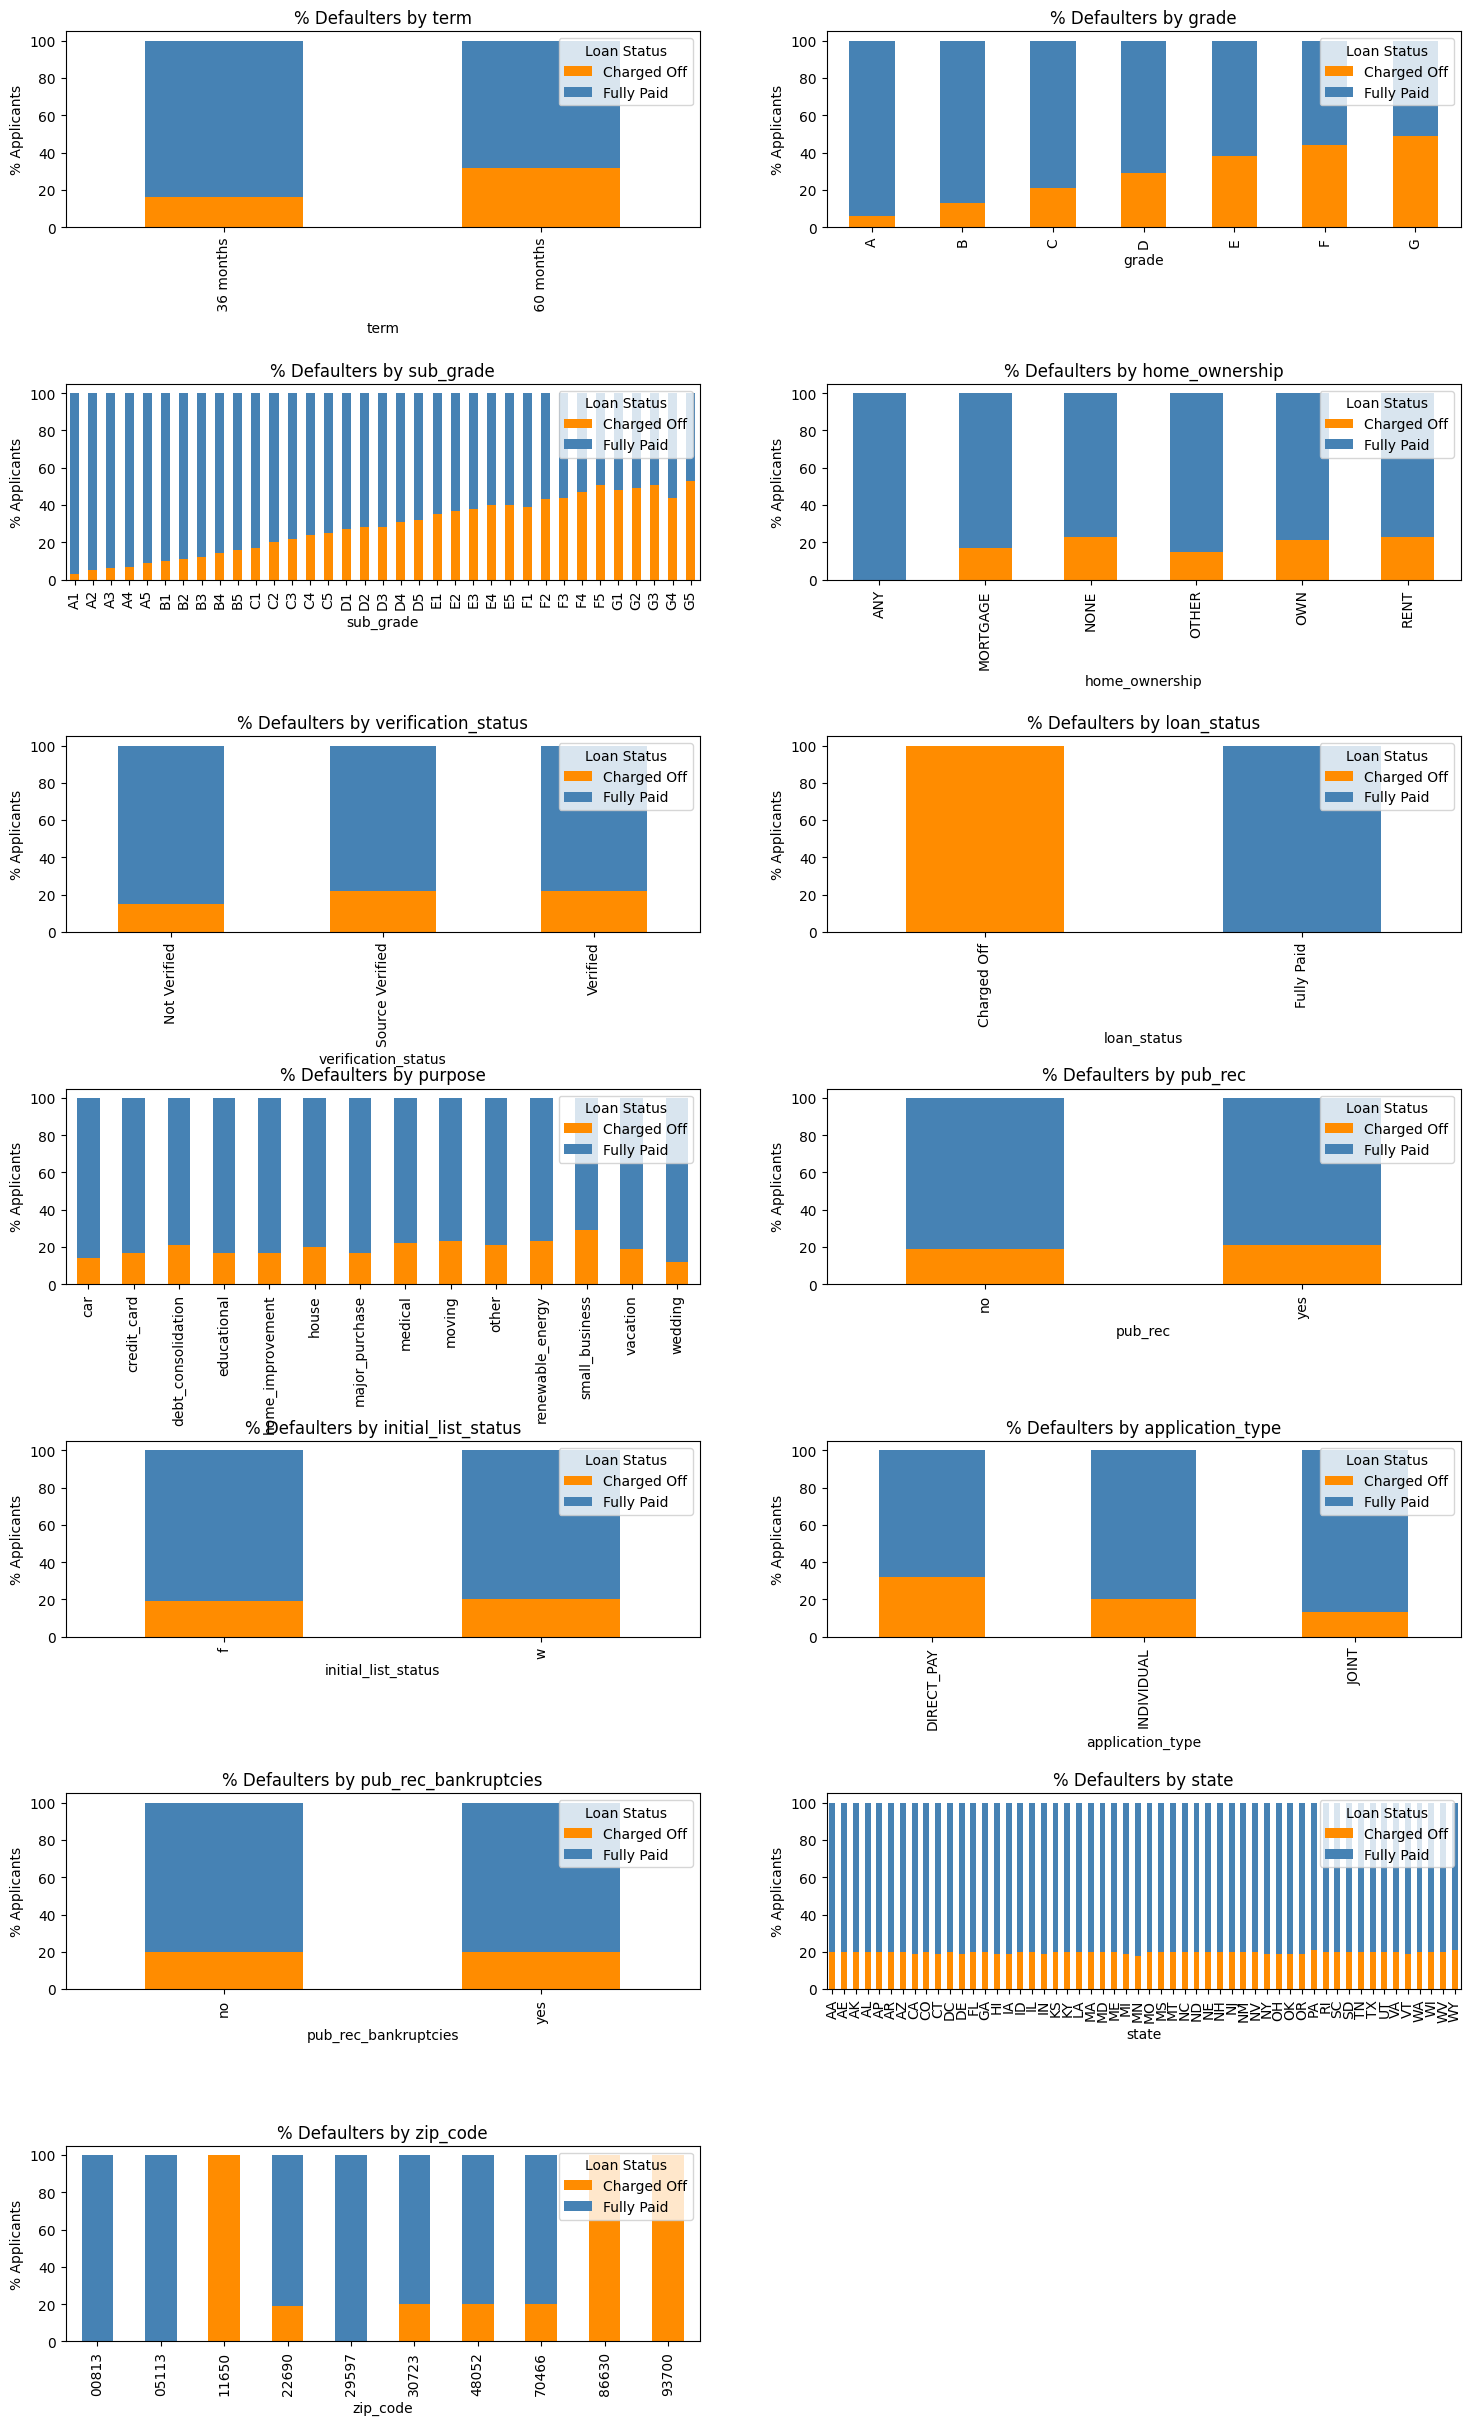

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns for plotting
plot_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
                'loan_status', 'purpose', 'pub_rec', 'initial_list_status',
                'application_type', 'pub_rec_bankruptcies', 'state', 'zip_code']

# Create 7 separate subplot grids
fig, axes = plt.subplots(7, 2, figsize=(18, 30))
fig.subplots_adjust(hspace=0.8)  # Increase the vertical space between subplots

# Loop through each categorical column and create a bar plot in each subplot
for i, col in enumerate(plot_columns):
    ax = axes[i // 2, i % 2]

    # Group by the specified column and loan status, then calculate the percentage
    data = df.groupby([col, 'loan_status']).size().unstack()
    data = data.div(data.sum(axis=1), axis=0).multiply(100).round()

    # Create stacked bar plot with different colors
    data.plot(kind='bar', stacked=True, color=['#FF8C00', '#4682B4'], ax=ax)

    # Set plot labels and title
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('% Applicants')
    ax.set_title(f'% Defaulters by {col}')

    # Adjust legend style
    ax.legend(title='Loan Status', loc='upper right')

# Remove the last subplot in the last figure (since it's just 1 subplot)
fig.delaxes(axes[6, 1])

# Display the plots
plt.show()


Observations:
* The % of defaulters is much higher for longer (60-month) term
* As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters
* Zip codes such as 11650, 86630 and 93700 have 100% defaulters
* We can remove initial_list_status and state as they have no impact on loan_status
* public records also don't seem to have any impact on loan_status surprisingly
* Direct pay application type has higher default rate compared to individual/joint
* Loan taken for the purpose of small business has the highest rate of default

In [52]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,zip_code
0,10000.0,36 months,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,no,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,no,OK,22690
1,8000.0,36 months,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,no,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,no,SD,05113
2,15600.0,36 months,10.49,B,B3,Statistician,1.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,no,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,no,WV,05113
3,7200.0,36 months,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,no,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,no,MA,00813
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,no,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,no,VA,11650


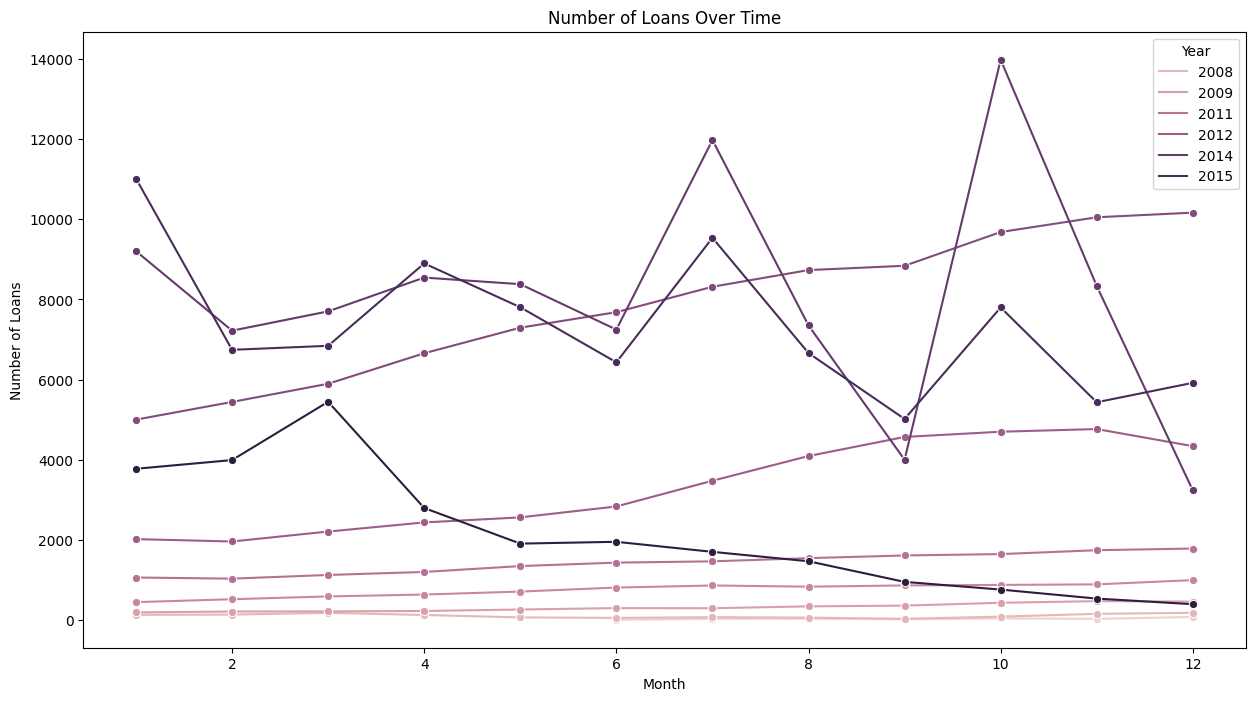

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract month and year from the 'issue_d' column
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year

# Create a new DataFrame to aggregate data for visualization
loan_counts_by_month_year = df.groupby(['issue_d_year', 'issue_d_month']).size().reset_index(name='loan_count')

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='issue_d_month', y='loan_count', hue='issue_d_year', data=loan_counts_by_month_year, marker='o')

plt.title('Number of Loans Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.legend(title='Year')
plt.show()


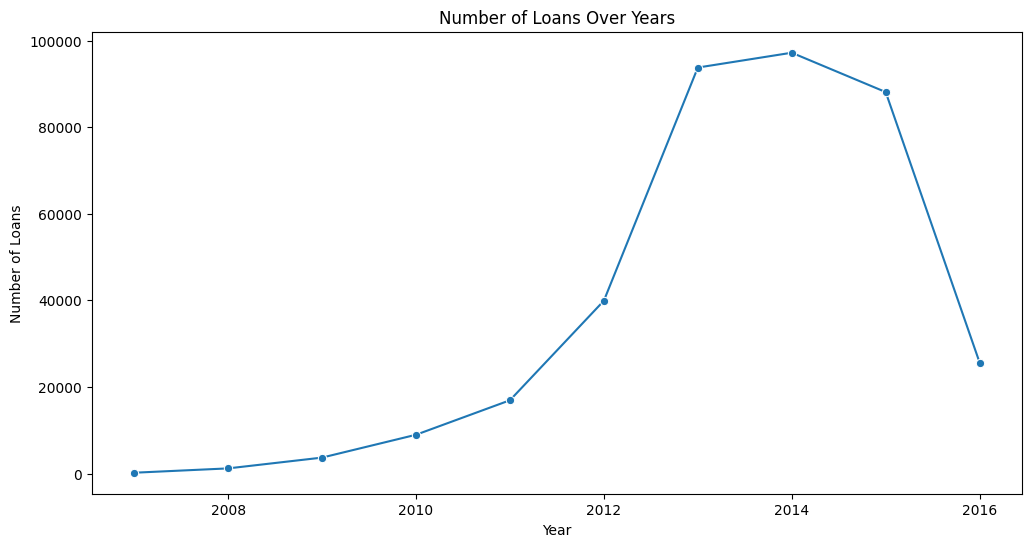

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year from the 'issue_d' column
df['issue_d_year'] = df['issue_d'].dt.year

# Create a new DataFrame to aggregate data for visualization
loan_counts_by_year = df.groupby('issue_d_year').size().reset_index(name='loan_count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='issue_d_year', y='loan_count', data=loan_counts_by_year, marker='o')

plt.title('Number of Loans Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.show()


Observations

* Maximum loans were given in 2014
* Most loans were given in last 3 months

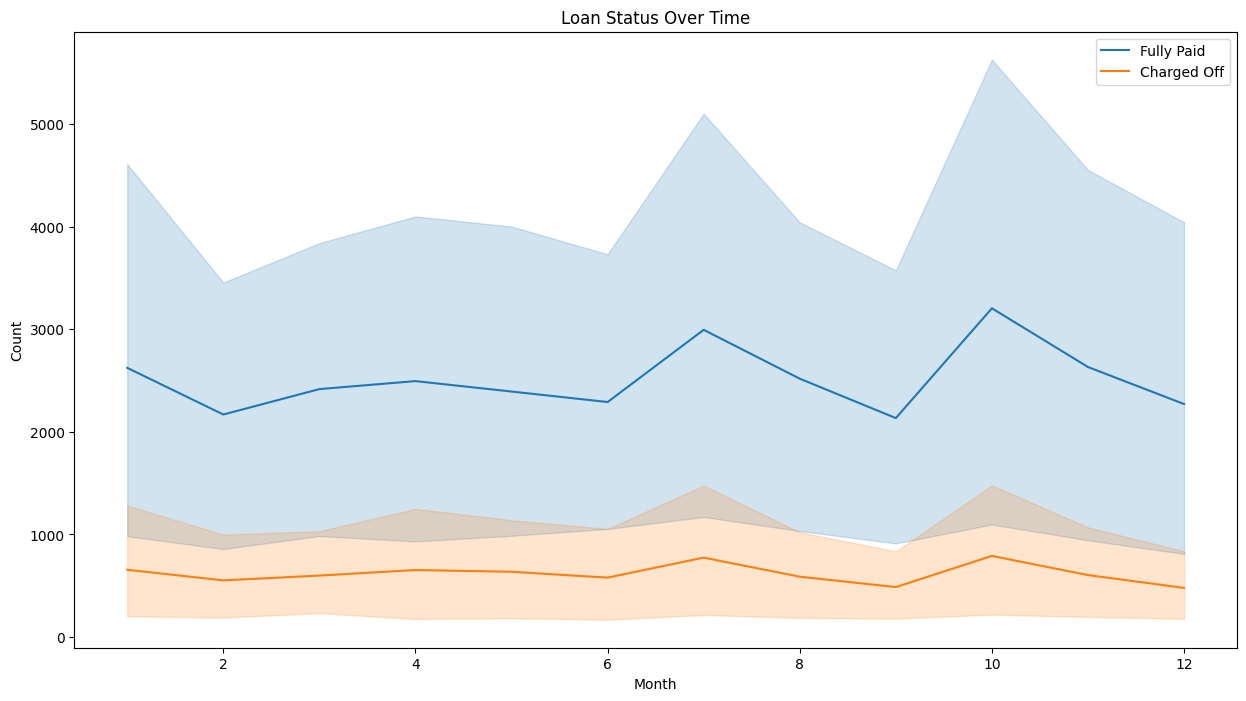

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame to aggregate data for visualization
plot_df = df.groupby(['issue_d_year', 'issue_d_month', 'loan_status']).size().unstack(fill_value=0).reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='issue_d_month', y='Fully Paid', data=plot_df, label='Fully Paid')
sns.lineplot(x='issue_d_month', y='Charged Off', data=plot_df, label='Charged Off')

plt.title('Loan Status Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


In [57]:

# Remove columns which do not have an impact on loan_status
df.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)

In [59]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,zip_code,issue_d_month,issue_d_year
0,10000.0,36 months,11.44,B,10.0,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,no,36369.0,41.8,25.0,INDIVIDUAL,0.0,no,22690,1,2015
1,8000.0,36 months,11.99,B,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,no,20131.0,53.3,27.0,INDIVIDUAL,3.0,no,05113,1,2015
2,15600.0,36 months,10.49,B,1.0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,no,11987.0,92.2,26.0,INDIVIDUAL,0.0,no,05113,1,2015
3,7200.0,36 months,6.49,A,6.0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,no,5472.0,21.5,13.0,INDIVIDUAL,0.0,no,00813,11,2014
4,24375.0,60 months,17.27,C,9.0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,no,24584.0,69.8,43.0,INDIVIDUAL,1.0,no,11650,4,2013


In [60]:
# Drop specified columns
columns_to_drop = [ 'issue_d_month', 'issue_d_year']
df = df.drop(columns=columns_to_drop, axis=1)


In [61]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,B,10.0,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,no,36369.0,41.8,25.0,INDIVIDUAL,0.0,no,22690
1,8000.0,36 months,11.99,B,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,no,20131.0,53.3,27.0,INDIVIDUAL,3.0,no,05113
2,15600.0,36 months,10.49,B,1.0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,no,11987.0,92.2,26.0,INDIVIDUAL,0.0,no,05113
3,7200.0,36 months,6.49,A,6.0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,no,5472.0,21.5,13.0,INDIVIDUAL,0.0,no,00813
4,24375.0,60 months,17.27,C,9.0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,no,24584.0,69.8,43.0,INDIVIDUAL,1.0,no,11650


## Data preparation for modeling

In [62]:

# Encoding Target Variable

df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

In [63]:

# Encoding Binary features into numerical dtype

x['term']=x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
x['pub_rec']=x['pub_rec'].map({'no': 0, 'yes':1}).astype(int)
x['pub_rec_bankruptcies']=x['pub_rec_bankruptcies'].map({'no': 0, 'yes':1}).astype(int)

cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()


,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0,20131.0,53.3,27.0,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,1.0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking Multicollinearity

In [68]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Assuming 'X' is your dataset
# You can use your own method to load your dataset

# Sample a subset of data (adjust the fraction as needed)
subset_fraction = 0.1
x_subset, _ = train_test_split(x, test_size=subset_fraction, random_state=42)

# Function to calculate VIF
def calculate_vif(data_frame):
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for the subset
vif_results_subset = calculate_vif(x_subset)
print(vif_results_subset)


                               Variable       VIF
0                             loan_amnt  1.890338
1                                  term  1.522109
2                            emp_length  1.077348
3                            annual_inc  1.712550
4                                   dti  1.442841
5                              open_acc  2.113102
6                               pub_rec  4.190018
7                             revol_bal  1.880344
8                            revol_util  1.562727
9                             total_acc  2.215193
10                             mort_acc  1.665942
11                 pub_rec_bankruptcies  4.157056
12                              grade_B  2.172566
13                              grade_C  2.387081
14                              grade_D  2.174544
15                              grade_E  1.850472
16                              grade_F  1.410438
17                              grade_G  1.100877
18                   home_ownership_ANY       inf


In [70]:


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)




,loan_amnt,term,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
300409,0.065232,0.0,0.555556,0.220472,0.279832,0.28,0.0,0.140302,0.482563,0.315789,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
300410,0.613177,0.0,0.777778,0.326772,0.186555,0.28,0.0,0.560784,0.682076,0.122807,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
300411,0.508806,0.0,0.111111,0.771654,0.082633,0.48,0.0,0.266295,0.387672,0.438596,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
300412,0.508806,0.0,1.000000,0.240157,0.147199,0.72,0.0,0.179514,0.312247,0.368421,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300413,0.595564,1.0,0.555556,0.188976,0.466667,0.64,0.0,0.534599,0.561233,0.631579,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Class Imbalance

In [71]:
# Oversampling to balance the target variable

sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")


Before OverSampling, count of label 1: 59194
Before OverSampling, count of label 0: 241220
After OverSampling, count of label 1: 241220
After OverSampling, count of label 0: 241220


## Building Logistic Regression Model

Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49


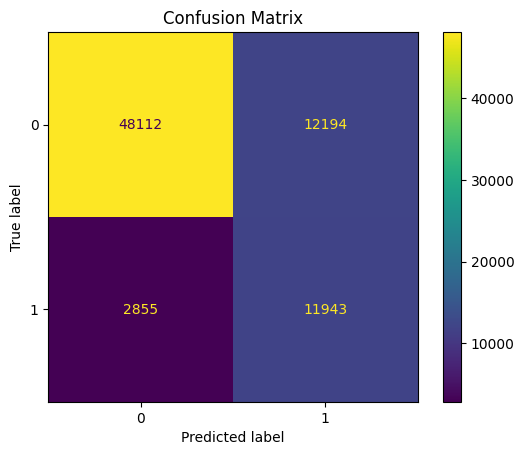

In [73]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [74]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     60306
           1       0.49      0.81      0.61     14798

    accuracy                           0.80     75104
   macro avg       0.72      0.80      0.74     75104
weighted avg       0.86      0.80      0.82     75104



* It can be observed that the recall score is very high (our model is able to identify 80% of actual defaulters) but the precision is low for positive class (of all the predicted defaulters, only 50% are actually defaulters).
* Although this model is effective in reducing NPAs by flagging most of the defaulters, it may cause loantap to deny loans to many deserving customers due to low precision (false positives)
* Low precision has also caused F1 score to drop to 60% even though accuracy is 80%

## Display Model Coefficients

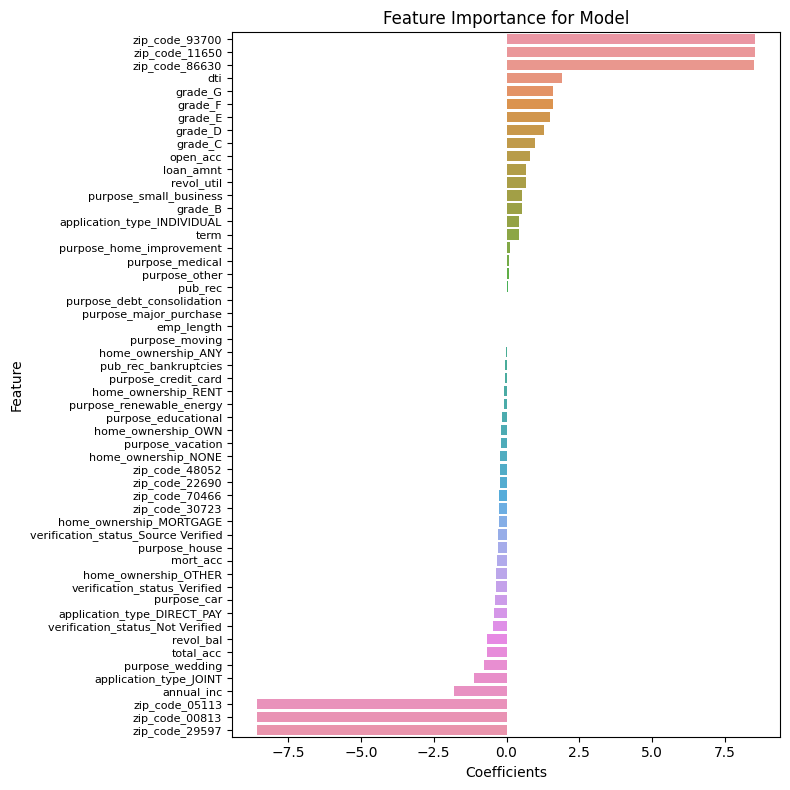

In [75]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

* The model has assigned large weightage to zip_code features followed by dti, grade G and grade F
* Similarly, large negative coefficients are assigned to a few zip codes, followed by annual income and joint application type

In [87]:
# Retrieve feature coefficients
coefficients = model.coef_[0]

# Create a DataFrame to associate coefficients with feature names
feature_coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})

# Sort features by absolute coefficient values to identify the most influential ones
feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top features
print(feature_coefficients)

                                Feature  Coefficient
44                       zip_code_00813    -8.573094
48                       zip_code_29597    -8.565927
45                       zip_code_05113    -8.556939
46                       zip_code_11650     8.534003
53                       zip_code_93700     8.525805
52                       zip_code_86630     8.496940
4                                   dti     1.922583
3                            annual_inc    -1.817147
17                              grade_G     1.611845
16                              grade_F     1.593661
15                              grade_E     1.479826
14                              grade_D     1.272280
43               application_type_JOINT    -1.112575
13                              grade_C     0.978597
5                              open_acc     0.799355
40                      purpose_wedding    -0.772144
8                            revol_util     0.679087
0                             loan_amnt     0.

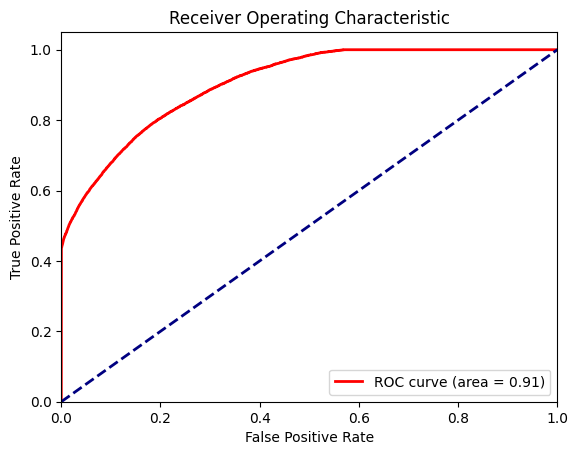

In [76]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

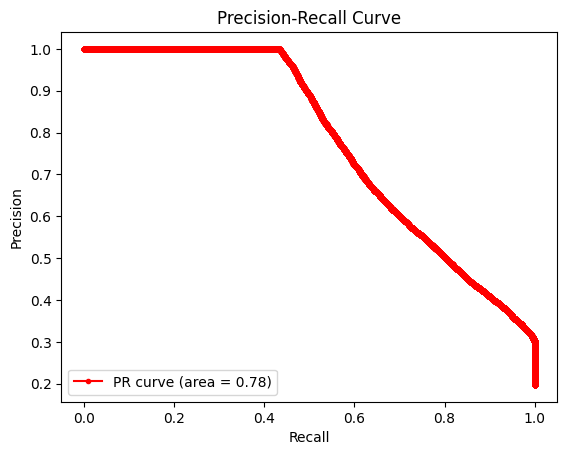

In [77]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.',color='red', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

## Insights
* Longer loan terms (60-month) correlate with a higher percentage of defaulters.

* Grades and sub-grades strongly influence loan default rates, with higher grades having more defaulters.

* Specific zip codes, such as 11650, 86630, and 93700, exhibit a 100% default rate.

* Initial list status and state variables show no impact on loan status and can be removed.

* Direct pay application types have a higher default rate compared to individual/joint applications.

* Loans for small businesses have the highest default rate among different purposes.

* Defaulters tend to have higher mean values for loan amount, interest rate, DTI, open accounts, and revolving utilization.

* Mean annual income is lower for defaulters.

* A Logistic Regression model, trained on upsampled data, achieved 80% accuracy.

* The model's precision, recall, and F1 scores on the negative class are 95%, 80%, and 87%, respectively.

* The positive class of the model exhibits a precision of 49%, recall of 81%, and F1 score of 61%.

* The ROC curve indicates an AUC of 0.91, demonstrating the model's ability to differentiate between classes.

* The Precision-Recall curve has an AUC of 0.78, suggesting potential improvement through hyperparameter tuning or increased model complexity.

## Recommendations

* Striking the Right Balance:

* Finding the right balance between precision and recall is crucial. It involves setting a classification threshold that aligns with the bank's risk tolerance and business goals.

* The bank needs to decide whether it prioritizes minimizing financial losses from defaults (higher precision) or maximizing lending opportunities (higher recall).
Adjusting the Classification Threshold:

*  The bank can adjust the threshold based on its risk appetite. A higher threshold increases precision but lowers recall, and vice versa.
* Continuous monitoring and analysis are essential to assess the impact of different thresholds on the overall performance of the lending model.

* Depending on business objectives, the bank may choose a threshold that balances precision and recall to achieve the desired outcomes.
* Regularly evaluate the model's performance, considering the evolving nature of the lending landscape and customer behaviors.

* Here F1 score maximization should be focused upon
* Repayment terms should be for small time like 36 months as more defaulters are present in 60 month term
* We can use better classifiers like random Forest for better results


